# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%d-%m-%Y')
df["date_end"] = pd.to_datetime(df["date_end"], format='%d-%m-%Y')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%d-%m-%Y')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%d-%m-%Y')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100000e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450000e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450000e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%d-%m-%Y')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [21]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [22]:
#group peak prices by companies and month
monthly_peak_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix':'mean'}).reset_index()

#Get January and December prices
Jan_peak_prices = monthly_peak_price_by_id.groupby('id').first().reset_index()
Dec_peak_prices = monthly_peak_price_by_id.groupby('id').last().reset_index()

#calculate the difference
peak_diff = pd.merge(Dec_peak_prices.rename(columns={'price_peak_var':'Dec_p1', 'price_peak_fix':'Dec_p2'}), Jan_peak_prices.drop(columns='price_date'), on='id')
peak_diff['peak_diff_dec_jan_energy'] = peak_diff['Dec_p1'] - peak_diff['price_peak_var']
peak_diff['peak_diff_dec_jan_power'] = peak_diff['Dec_p2'] - peak_diff['price_peak_fix']
peak_diff = peak_diff[['id', 'peak_diff_dec_jan_energy' , 'peak_diff_dec_jan_power']]
peak_diff.head()


,id,peak_diff_dec_jan_energy,peak_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [23]:
#group mid peak prices by companies and month
monthly_mid_peak_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_mid_peak_var':'mean', 'price_mid_peak_fix':'mean'}).reset_index()

#Get January and December prices
jan_mid_peak_price = monthly_mid_peak_price_by_id.groupby('id').first().reset_index()
dec_mid_peak_price = monthly_mid_peak_price_by_id.groupby('id').last().reset_index()

#Diff bw dec and jan prices
mid_peak_diff = pd.merge(dec_mid_peak_price.rename(columns={'price_mid_peak_var':'dec_mp1', 'price_mid_peak_fix':'dec_mp2'}), jan_mid_peak_price.drop(columns='price_date'), on='id')
mid_peak_diff['mid_peak_diff_dec_jan_energy'] = mid_peak_diff['dec_mp1'] - mid_peak_diff['price_mid_peak_var']
mid_peak_diff['mid_peak_diff_dec_jan_power'] = mid_peak_diff['dec_mp2'] - mid_peak_diff['price_mid_peak_fix']
mid_peak_diff = mid_peak_diff[['id', 'mid_peak_diff_dec_jan_energy' , 'mid_peak_diff_dec_jan_power']]
mid_peak_diff.head()

,id,mid_peak_diff_dec_jan_energy,mid_peak_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [24]:
#merge off_peak_diff and peak_diff
price_diff = pd.merge(diff, peak_diff, on='id')
price_diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_jan_energy,peak_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000


In [25]:
client_df = pd.read_csv('./client_data.csv')
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30-03-2010,30-03-2016,30-03-2010,31-03-2015,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,13-01-2010,07-03-2016,13-01-2010,09-03-2015,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [33]:
#merge client_df with price_diff
client_diff = pd.merge(client_df, price_diff, on='id')
client_diff.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_jan_energy,peak_diff_dec_jan_power,peak_energy,peak_power,off_peak_energy,off_peak_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,43.648,1,0.020057,3.700961,-0.017912,-24.339581,0.0,0.0,1.0,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,13.800,0,-0.003767,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,13.856,0,-0.004670,0.177779,0.000528,0.000000,1.0,0.0,0.0,1.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30-03-2010,30-03-2016,30-03-2010,31-03-2015,240.04,...,13.200,0,-0.004547,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,13-01-2010,07-03-2016,13-01-2010,09-03-2015,445.75,...,19.800,0,-0.006192,0.162916,-0.002302,0.097749,0.0,1.0,0.0,1.0


In [27]:
!pip install scikit-learn

In [28]:
from sklearn.preprocessing import Binarizer


In [34]:
client_diff['peak_energy'] = Binarizer().fit_transform(client_diff['peak_diff_dec_jan_energy'].values.reshape(-1,1))
client_diff['peak_power'] = Binarizer().fit_transform(client_diff['peak_diff_dec_jan_power'].values.reshape(-1,1))

client_diff['off_peak_energy'] = Binarizer().fit_transform(client_diff['offpeak_diff_dec_january_energy'].values.reshape(-1,1))
client_diff['off_peak_power'] = Binarizer().fit_transform(client_diff['offpeak_diff_dec_january_power'].values.reshape(-1,1))

client_diff

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_jan_energy,peak_diff_dec_jan_power,peak_energy,peak_power,off_peak_energy,off_peak_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,43.648,1,0.020057,3.700961,-0.017912,-24.339581,0.0,0.0,1.0,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,13.800,0,-0.003767,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,13.856,0,-0.004670,0.177779,0.000528,0.000000,1.0,0.0,0.0,1.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30-03-2010,30-03-2016,30-03-2010,31-03-2015,240.04,...,13.200,0,-0.004547,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,13-01-2010,07-03-2016,13-01-2010,09-03-2015,445.75,...,19.800,0,-0.006192,0.162916,-0.002302,0.097749,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,24-05-2012,08-05-2016,08-05-2015,26-05-2014,4648.01,...,15.000,0,-0.008653,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,27-08-2012,27-08-2016,27-08-2012,28-08-2015,631.69,...,6.000,1,-0.007395,0.236694,-0.003727,0.145963,0.0,1.0,0.0,1.0
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,08-02-2012,07-02-2016,08-02-2012,09-02-2015,190.39,...,15.935,1,-0.006192,0.162916,-0.002302,0.097749,0.0,1.0,0.0,1.0
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,30-08-2012,30-08-2016,30-08-2012,31-08-2015,19.34,...,11.000,0,-0.003767,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0


In [37]:
client_diff = client_diff.select_dtypes(exclude=['object'])
client_diff

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_jan_energy,peak_diff_dec_jan_power,peak_energy,peak_power,off_peak_energy,off_peak_power
0,0,54946,0,0.00,0,0,1.78,0.114481,0.098142,40.606701,...,43.648,1,0.020057,3.700961,-0.017912,-24.339581,0.0,0.0,1.0,1.0
1,4660,0,0,189.95,0,0,16.27,0.145711,0.000000,44.311378,...,13.800,0,-0.003767,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0
2,544,0,0,47.96,0,0,38.72,0.165794,0.087899,44.311378,...,13.856,0,-0.004670,0.177779,0.000528,0.000000,1.0,0.0,0.0,1.0
3,1584,0,0,240.04,0,0,19.83,0.146694,0.000000,44.311378,...,13.200,0,-0.004547,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0
4,4425,0,526,445.75,526,0,131.73,0.116900,0.100015,40.606701,...,19.800,0,-0.006192,0.162916,-0.002302,0.097749,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,32270,47940,0,4648.01,0,0,18.57,0.138305,0.000000,44.311378,...,15.000,0,-0.008653,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0
14602,7223,0,181,631.69,181,0,144.03,0.100167,0.091892,58.995952,...,6.000,1,-0.007395,0.236694,-0.003727,0.145963,0.0,1.0,0.0,1.0
14603,1844,0,179,190.39,179,0,129.60,0.116900,0.100015,40.606701,...,15.935,1,-0.006192,0.162916,-0.002302,0.097749,0.0,1.0,0.0,1.0
14604,131,0,0,19.34,0,0,7.18,0.145711,0.000000,44.311378,...,11.000,0,-0.003767,0.177779,0.000000,0.000000,0.0,0.0,0.0,1.0


In [40]:
import seaborn as sns

<Axes: >

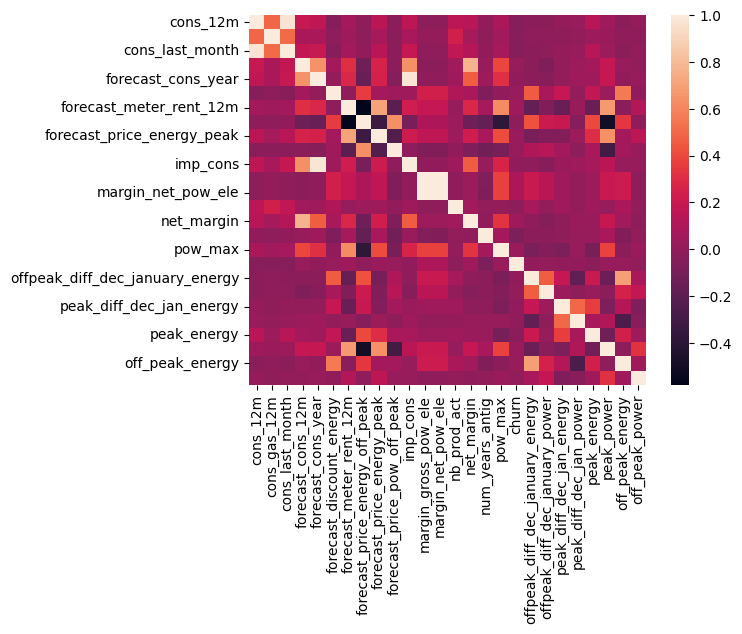

In [41]:
#creating a heatmap
corr = client_diff.corr()
sns.heatmap(corr)